# Example of Data Analysis with DCD Hub Data

First, we import the Python SDK

In [9]:
from dcd.entities.thing import Thing

We provide the thing ID and access token (replace with yours)

In [10]:
from dotenv import load_dotenv
import os
load_dotenv()
THING_ID = os.environ['THING_ID']
THING_TOKEN = os.environ['THING_TOKEN']

We instantiate a Thing with its credential, then we fetch its details

In [11]:
my_thing = Thing(thing_id=THING_ID, token=THING_TOKEN)
my_thing.read()

INFO:dcd:things:wheelchair_speed-e706:Initialising MQTT connection for Thing 'dcd:things:wheelchair_speed-e706'
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
INFO:dcd:things:wheelchair_speed-e706:Connection successful
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:wheelchair_speed-e706 HTTP/1.1" 200 6724


DigiCertCA.crt exist.
{'thing': {'id': 'dcd:things:wheelchair_speed-e706', 'name': 'Wheelchair_speed', 'description': '', 'type': 'Speed', 'properties': [{'type': 'THREE_DIMENSIONS', 'name': 'My Random Property', 'description': '', 'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Value2', 'description': '', 'unit': ''}, {'name': 'Value3', 'description': '', 'unit': ''}, {'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Value2', 'description': '', 'unit': ''}, {'name': 'Value3', 'description': '', 'unit': ''}], 'id': 'my-random-property-5f3c', 'classes': [], 'values': [], 'entityId': 'dcd:things:wheelchair_speed-e706', 'readAt': 1572255790766, 'registeredAt': 1571392699000}, {'type': 'ONE_DIMENSION', 'name': 'one', 'description': '', 'dimensions': [{'name': 'Value', 'description': '', 'unit': ''}], 'id': 'one-28d7', 'classes': [], 'values': [], 'entityId': 'dcd:things:wheelchair_speed-e706', 'readAt': 1572255790766, 'registeredAt': 1571994791000}, {

What does a Thing look like?

In [12]:
my_thing.to_json()

{'id': 'dcd:things:wheelchair_speed-e706',
 'name': 'Wheelchair_speed',
 'description': '',
 'type': 'Speed',
 'properties': [{'id': 'my-random-property-5f3c',
   'name': 'My Random Property',
   'description': '',
   'type': 'THREE_DIMENSIONS',
   'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': '', 'unit': ''},
    {'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': '', 'unit': ''}]},
  {'id': 'one-28d7',
   'name': 'one',
   'description': '',
   'type': 'ONE_DIMENSION',
   'dimensions': [{'name': 'Value', 'description': '', 'unit': ''}]},
  {'id': 'random-shit-aa03',
   'name': 'RANDOM SHIT',
   'description': '',
   'type': 'THREE_DIMENSIONS',
   'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Val

Which property do we want to explore and over which time frame?

In [13]:
from datetime import datetime
# What dates?
START_DATE = "2019-10-08 21:17:00"
END_DATE = "2019-11-08 21:25:00"

from datetime import datetime
DATE_FORMAT = '%Y-%m-%d %H:%M:%S'
from_ts = datetime.timestamp(datetime.strptime(START_DATE, DATE_FORMAT)) * 1000
to_ts = datetime.timestamp(datetime.strptime(END_DATE, DATE_FORMAT)) * 1000

Let's find this property and read the data.

In [14]:
PROPERTY_NAME = "My Random Property 18"

my_property = my_thing.find_property_by_name(PROPERTY_NAME)
my_property.read(from_ts, to_ts)

AttributeError: 'NoneType' object has no attribute 'read'

How many data point did we get?

In [15]:
print(len(my_property.values))

AttributeError: 'NoneType' object has no attribute 'values'

Display values

In [16]:
my_property.values

AttributeError: 'NoneType' object has no attribute 'values'

# From CSV

In [22]:
from numpy import genfromtxt
import pandas as pd
data = genfromtxt('test.csv', delimiter=',')
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')), columns = ['v'])
data_frame

,v
1970-01-01 00:00:00.001,1.0
1970-01-01 00:00:00.002,2.0
1970-01-01 00:00:00.003,3.0
1970-01-01 00:00:00.004,4.0
1970-01-01 00:00:00.005,5.0
1970-01-01 00:00:00.006,6.0
1970-01-01 00:00:00.007,7.0
1970-01-01 00:00:00.008,8.0
1970-01-01 00:00:00.009,9.0
1970-01-01 00:00:00.010,10.0


# Plot some charts with Matplotlib
In this example we plot an histogram, distribution of all values and dimensions.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1)
plt.plot(data) #veranderen naar echte value plot
plt.show()

In [ ]:
slider = widgets.IntSlider()
text = widgets.IntText()
display(slider, text)
widgets.jslink((slider, 'value'), (text, 'value'))

In [ ]:
a = widgets.ToggleButtons()
widgets.ToggleButtons(
    options=['10%', '50%', '100%'],
    description='Deviation',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['+- 10% from initial velocity', '+- 50% from initial velocity', '+- 100% from initial velocity'],
)

In [ ]:
int_range = widgets.IntSlider()
output2 = widgets.Output()

display(int_range, output2)

def on_value_change(change):
    with output2:
        print(change['new'])
        return output2

int_range.observe(on_value_change, names='value')

In [ ]:
from numpy import genfromtxt
import pandas as pd
data = (genfromtxt('test.csv', delimiter=','))
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')), columns = ['v'])
data_frame

In [8]:
from IPython.display import display
slider = widgets.IntSlider()
display(slider)

NameError: name 'widgets' is not defined

In [206]:
#a = widgets.FloatSlider()
#text = widgets.FloatText()
#display(a, text)
#widgets.jslink((a, 'value'), (text, 'value'))


a = widgets.IntSlider(description='Deviation')
def f(a):
    print('{}'.format(a, a))
    return out

out = widgets.interactive_output(f, {'a': a})

widgets.HBox([widgets.VBox([a]), out])


In [92]:
btn = widgets.Button(description='Test')
display(btn)
def btn_eventhandler(obj):
    print('Er is op me geklikt ({})'.format(obj.description))
btn.on_click(btn_eventhandler)

Button(description='Test', style=ButtonStyle())

Er is op me geklikt (Test)
Er is op me geklikt (Test)


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import ma
data = np.array(my_property.values)

AttributeError: 'NoneType' object has no attribute 'values'

In [207]:
#b = map(float, a[0].split("*"))

TypeError: 'IntSlider' object is not subscriptable

In [208]:
figure(num=None, figsize=(15, 5))
t = data_frame.index
plt.plot(t, (data_frame.v * float([out])))

TypeError: float() argument must be a string or a number, not 'list'

<Figure size 1080x360 with 0 Axes>

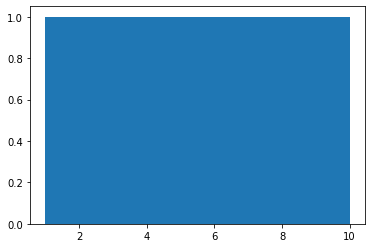

In [101]:
plt.hist(data[:,1:])
plt.show()

In [191]:
a = widgets.IntSlider(description='a')
def f(a):
    print('{}'.format(a, a))

out = widgets.interactive_output(f, {'a': a})

widgets.HBox([widgets.VBox([a]), out])

# Generate statistics with NumPy and Pandas

In [27]:
import numpy as np
from scipy.stats import kurtosis, skew

In [28]:
np.min(data[:,1:4], axis=0)

array([1.])

In [29]:
skew(data[:,1:4])

array([0.])

You can select a column (slice) of data, or a subset of data. In the example below we select rows
from 10 to 20 (10 in total) and the colum 1 to x (i.e skiping the first column representing the time).

In [32]:
data[:5,:]

array([[1., 1.],
       [2., 2.],
       [3., 3.],
       [4., 4.],
       [5., 5.]])

Out of the box, Pandas give you some statistics, do not forget to convert your array into a DataFrame.

In [33]:
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')))
pd.DataFrame.describe(data_frame)

,0
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


In [40]:
data_frame.rolling(10).std()

,0
1970-01-01 00:00:00.001,NaN
1970-01-01 00:00:00.002,NaN
1970-01-01 00:00:00.003,NaN
1970-01-01 00:00:00.004,NaN
1970-01-01 00:00:00.005,NaN
1970-01-01 00:00:00.006,NaN
1970-01-01 00:00:00.007,NaN
1970-01-01 00:00:00.008,NaN
1970-01-01 00:00:00.009,NaN
1970-01-01 00:00:00.010,3.02765


# Rolling / Sliding Window
To apply statistics on a sliding (or rolling) window, we can use the rolling() function of a data frame. In the example below, we roll with a window size of 4 elements to apply a skew()

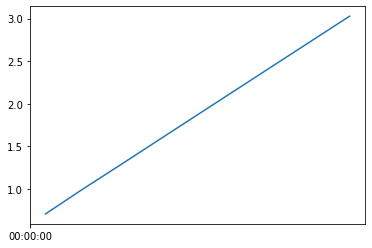

In [41]:
rolling2s = data_frame.rolling('2s').std()
plt.plot(rolling2s)
plt.show()

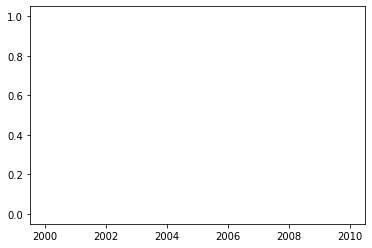

In [20]:
rolling100_data_points = data_frame.rolling(100).skew()
plt.plot(rolling100_data_points)
plt.show()

# Zero Crossing

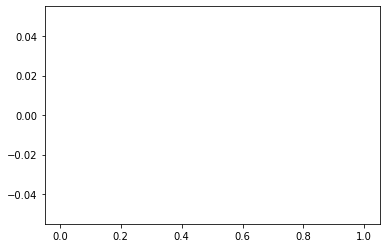

In [21]:
plt.hist(np.where(np.diff(np.sign(data[:,1]))))
plt.show()

https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions